###**1. Importing Libraries for reading data**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [2]:
# Set the logging configuration
logging.basicConfig(filename='credit_risk_analysis.log', level=logging.DEBUG,
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Logging the start of the script
logging.info("Starting the credit risk analysis script.")

In [3]:
bank = pd.read_csv("/content/german_credit.csv")


In [4]:
# Logging the data reading success
logging.info("Data successfully loaded.")

In [5]:
bank.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


### **2. Exploratory Data Analysis**

In [6]:
# Logging the Data Exploratory Analysis initiation
logging.info("Data Exploratory Analysis started.")

In [7]:
bank.shape

(1000, 21)

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [9]:
bank.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [10]:
bank.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [11]:
bank.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

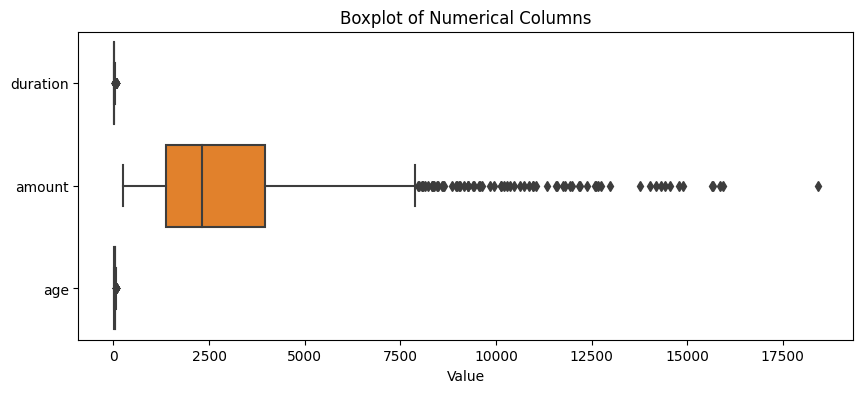

In [12]:
# Identify numerical columns
numerical_columns = bank.select_dtypes(include=[np.number]).columns

# Function to find outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in each numerical column
outliers_dict = {}
for column in numerical_columns:
    outliers_dict[column] = find_outliers_iqr(bank, column)


# Plot boxplots for each numerical column
plt.figure(figsize=(10,4))
sns.boxplot(data=bank[numerical_columns], orient='h')
plt.title("Boxplot of Numerical Columns")
plt.xlabel("Value")
plt.show()

In [13]:
bank["credit_risk"].value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

**ANALYSIS:1**

1. Initial analysis shows there are 1000 rows with 700 good credit risk and 300 bad credit risk.
2. There are 3 Numerical variables and 17 categorical variables with 1 showing the output ["credit_risk"].
3. People have taken loans from age of 19 till 75 years.
4. There are no significant outliers other than amount.


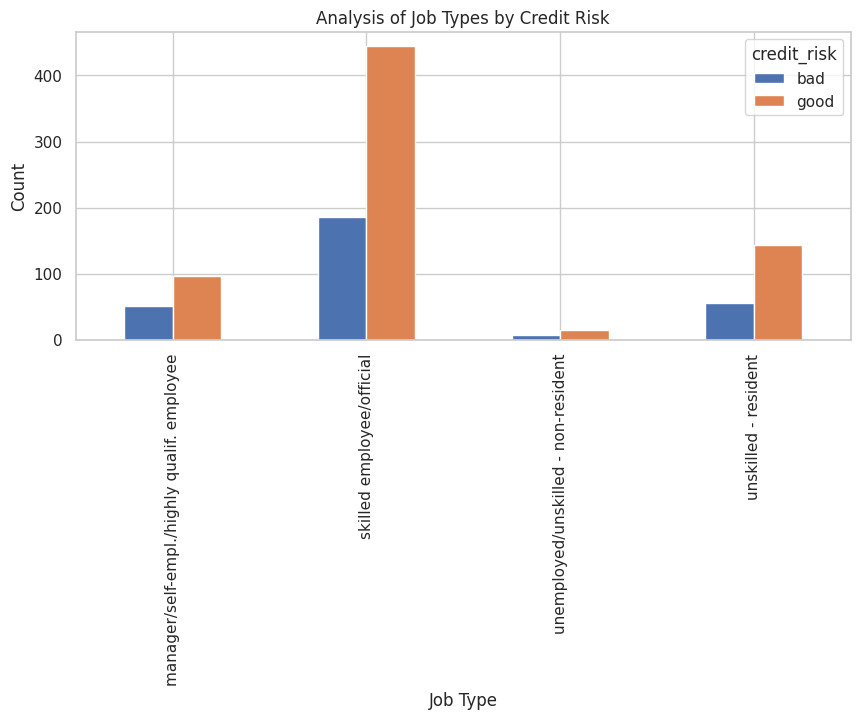

In [14]:
#Analysis of Job Types by Credit Risk
job_counts = bank.groupby(['job', 'credit_risk']).size().unstack()

# Plotting the stacked bar chart using seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
job_counts.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and labels
ax.set_title('Analysis of Job Types by Credit Risk')
ax.set_xlabel('Job Type')
ax.set_ylabel('Count')

# Display the chart
plt.show()

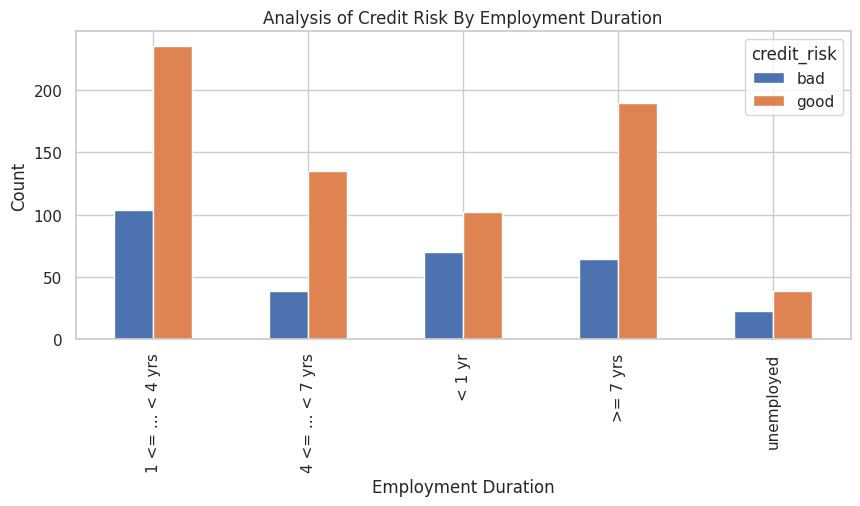

In [15]:
#Analysis of Credit Risk by Employment Duration
duration = bank.groupby(['employment_duration', 'credit_risk']).size().unstack()

# Plotting the stacked bar chart using seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
duration.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and labels
ax.set_title('Analysis of Credit Risk By Employment Duration')
ax.set_xlabel('Employment Duration')
ax.set_ylabel('Count')

# Display the chart
plt.show()

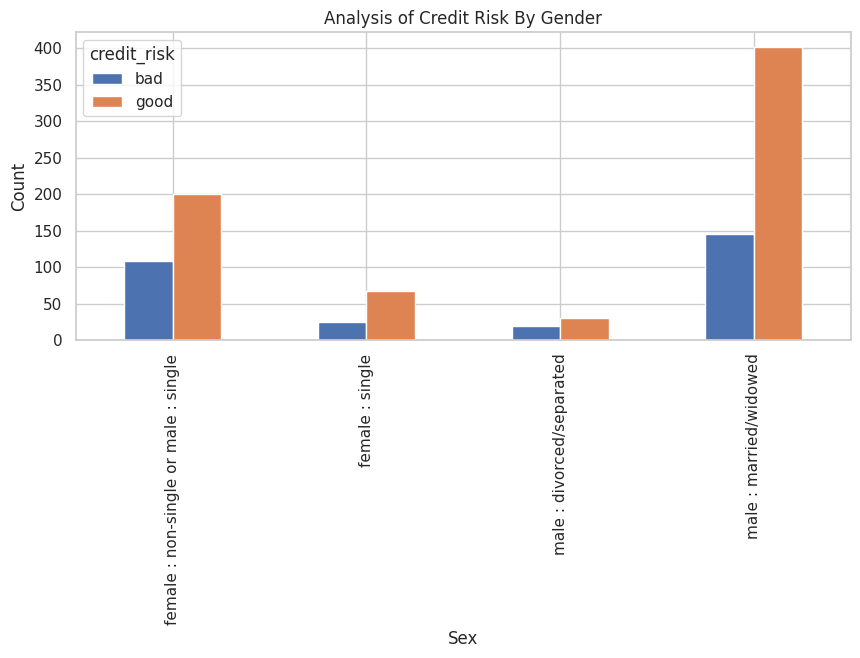

In [16]:
#Analysis of Credit Risk by Gender
gender = bank.groupby(['personal_status_sex', 'credit_risk']).size().unstack()

# Plotting the stacked bar chart using seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
gender.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and labels
ax.set_title('Analysis of Credit Risk By Gender')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

# Display the chart
plt.show()

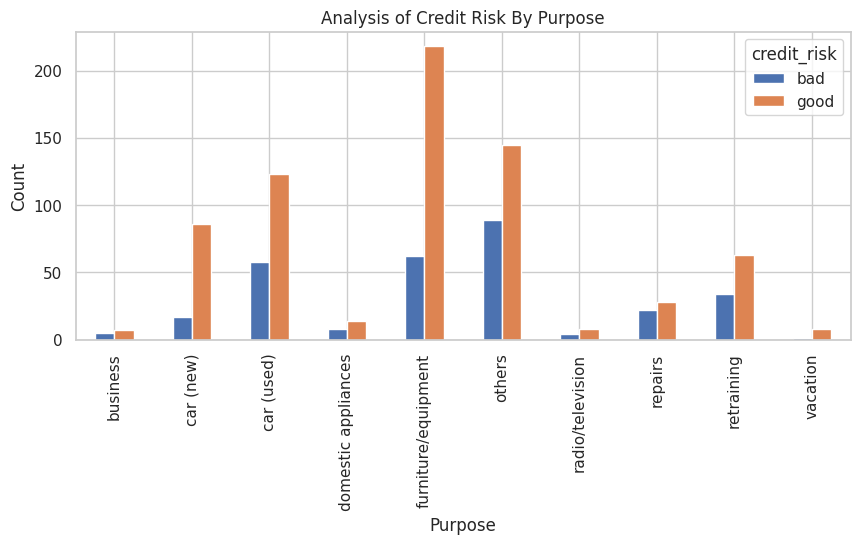

In [17]:
#Analysis of Credit Risk by Purpose
purpose = bank.groupby(['purpose', 'credit_risk']).size().unstack()

# Plotting the stacked bar chart using seaborn
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 4))
purpose.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and labels
ax.set_title('Analysis of Credit Risk By Purpose')
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')

# Display the chart
plt.show()

In [18]:
# Create age groups
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['below 20', '20-29', '30-39', '40-49', '50-59', 'above 60']
bank['age_group'] = pd.cut(bank['age'], bins=bins, labels=labels, right=False)

# Create a table with age groups and value counts
age_counts = bank['age_group'].value_counts().reset_index().sort_values('index')
age_counts.columns = ['Age Group', 'Count']
age_counts = age_counts.set_index('Age Group')

# Group by age groups and credit_risk and count the occurrences
grouped = bank.groupby(['age_group', 'credit_risk']).size().reset_index(name='count')

# Calculate the total count for each age group
total_counts = grouped.groupby('age_group')['count'].sum()

# Calculate the category percentages separately for 'good' and 'bad' credit risks
grouped['percentage'] = grouped.apply(lambda row: (row['count'] / total_counts[row['age_group']]) * 100, axis=1)

# Create separate tables for 'good' and 'bad' credit risks
good_risk_table = grouped[grouped['credit_risk'] == 'good'].set_index('age_group')[['count', 'percentage']]
good_risk_table.columns = ['Good Credit Risk Count', 'Good Credit Risk Percentage']

bad_risk_table = grouped[grouped['credit_risk'] == 'bad'].set_index('age_group')[['count', 'percentage']]
bad_risk_table.columns = ['Bad Credit Risk Count', 'Bad Credit Risk Percentage']

# Join the tables
result_table = age_counts.join(good_risk_table).join(bad_risk_table)

# Print the table
print(result_table.to_string())


           Count  Good Credit Risk Count  Good Credit Risk Percentage  Bad Credit Risk Count  Bad Credit Risk Percentage
Age Group                                                                                                               
below 20       2                       1                    50.000000                      1                   50.000000
20-29        367                     231                    62.942779                    136                   37.057221
30-39        332                     247                    74.397590                     85                   25.602410
40-49        176                     132                    75.000000                     44                   25.000000
50-59         72                      51                    70.833333                     21                   29.166667
above 60      51                      38                    74.509804                     13                   25.490196


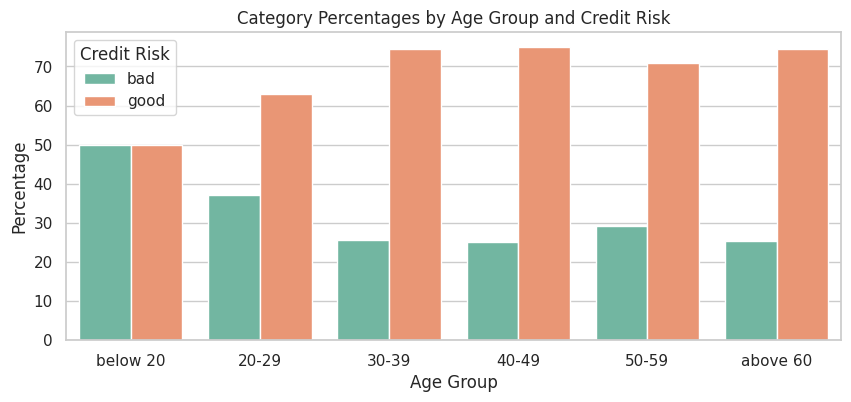

In [19]:
# Create age groups
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['below 20', '20-29', '30-39', '40-49', '50-59', 'above 60']
bank['age_group'] = pd.cut(bank['age'], bins=bins, labels=labels, right=False)

# Create a table with age groups and value counts
age_counts = bank['age_group'].value_counts().reset_index().sort_values('index')
age_counts.columns = ['Age Group', 'Count']

# Group by age groups and credit_risk and count the occurrences
grouped = bank.groupby(['age_group', 'credit_risk']).size().reset_index(name='count')

# Calculate the total count for each age group
total_counts = grouped.groupby('age_group')['count'].sum()

# Calculate the category percentages separately for 'good' and 'bad' credit risks
grouped['percentage'] = grouped.apply(lambda row: (row['count'] / total_counts[row['age_group']]) * 100, axis=1)

# Create a bar chart using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(data=grouped, x='age_group', y='percentage', hue='credit_risk', palette='Set2')

# Customize the plot
plt.title('Category Percentages by Age Group and Credit Risk')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Credit Risk')

# Show the plot
plt.show()

In [20]:
bank.groupby(['credit_history', 'credit_risk']).size().unstack()

credit_risk,bad,good
credit_history,,
all credits at this bank paid back duly,50,243
critical account/other credits elsewhere,28,21
delay in paying off in the past,25,15
existing credits paid back duly till now,28,60
no credits taken/all credits paid back duly,169,361


In [21]:
bank.groupby(['purpose', 'credit_risk']).size().unstack()

credit_risk,bad,good
purpose,,
business,5,7
car (new),17,86
car (used),58,123
domestic appliances,8,14
furniture/equipment,62,218
others,89,145
radio/television,4,8
repairs,22,28
retraining,34,63


In [22]:
bank.groupby(['job', 'credit_risk']).size().unstack()

credit_risk,bad,good
job,,
manager/self-empl./highly qualif. employee,51,97
skilled employee/official,186,444
unemployed/unskilled - non-resident,7,15
unskilled - resident,56,144


In [23]:
# Logging the Data Exploratory Analysis success
logging.info("Data Exploratory Analysis ended.")

**ANALYSIS:2**

1. Skilled employees takes the highest amount of loans where the percentage of good loans are higher.
2. Manager , Self employed or highly qualified employee have higher rate of bad loans whereas  Unskilled residents have a better rate of good loans.
3. Most of the loans have been taken by people employed between 1 and 4 years with a significant number of good loans.
4. People employed between 4 to 7 years have high percenatge of good loans while those below 1 year have high percentage of bad loans.
5. Most of the loans have been taken loans for buying furnitures or some other equipments with a significant number of good loans.
6. People have taken loans for buying new cars have best rate of returning loans while those with repairs have high percentage of bad loans.
7. People in age-group 20-29 have taken most loans closely following with 30-39 .
8. People in 30-39 and those above 60 have best percentage of good loans.









In [24]:
# Logging the Feature Extraction initiation
logging.info("Feature Extraction started.")

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns = bank.columns

for column in columns:
    bank[column] = le.fit_transform(bank[column])

In [26]:
#Perform chi-square test
from sklearn.feature_selection import chi2

# Separate the features (columns) from the target variable
X = bank.drop(['credit_risk','age_group'], axis=1)  # Remove the 'credit_risk' column from features
Y = bank['credit_risk']  # Target variable containing credit risk labels

#'age_group' is also a feature, so we can remove it from X using:
bank = bank.drop(['age_group'], axis=1)

# Apply chi-square test to calculate the chi2 statistic and p-values
chi2_stat, p_values = chi2(X, Y)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Feature': X.columns, 'p-value': p_values})

# Sort the DataFrame by p-values in ascending order
sorted_result_df = result_df.sort_values('p-value')

# Print the sorted DataFrame
print(sorted_result_df)

                    Feature        p-value
4                    amount  4.826920e-283
1                  duration   1.198327e-43
12                      age   1.253929e-15
0                    status   5.338991e-06
2            credit_history   2.513123e-04
5                   savings   1.031141e-03
3                   purpose   7.095836e-03
19           foreign_worker   1.086189e-02
14                  housing   1.319208e-02
8       personal_status_sex   1.491882e-02
11                 property   7.102120e-02
15           number_credits   1.905968e-01
18                telephone   3.733300e-01
16                      job   3.853131e-01
13  other_installment_plans   4.513605e-01
10        present_residence   6.907920e-01
6       employment_duration   7.585851e-01
9             other_debtors   7.695248e-01
7          installment_rate   7.970782e-01
17            people_liable   9.301641e-01


In [27]:
# Filter the DataFrame for categories with p-value < 0.05
significant_categories = sorted_result_df[sorted_result_df['p-value'] < 0.05]

# Print the significant categories
print(significant_categories)

                Feature        p-value
4                amount  4.826920e-283
1              duration   1.198327e-43
12                  age   1.253929e-15
0                status   5.338991e-06
2        credit_history   2.513123e-04
5               savings   1.031141e-03
3               purpose   7.095836e-03
19       foreign_worker   1.086189e-02
14              housing   1.319208e-02
8   personal_status_sex   1.491882e-02


In [28]:
# Logging the Feature Extraction success
logging.info("Feature Extraction ended.")

**ANALYSIS:3**

1. By performing chi-square test, we get to find that amount, duration,age,status,credit_history,savings,purpose,foreign_worker,housing,personal_status_sex have most dependencies on the target value[credit_risk].

### **3. Feature Transformation**

In [29]:
# Logging the Feature Transformation initiation.
logging.info("Feature Transformation started.")

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

std_data = scaler.transform(X)
Y = bank["credit_risk"]

In [31]:
X.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,3,13,0,2,116,4,2,2,0,2,3,1,2,1,0,0,1,0,0,0
1,3,5,0,5,528,4,0,1,3,2,0,3,17,1,0,1,1,1,0,0
2,0,8,4,8,72,0,1,1,0,2,3,3,4,1,0,0,3,0,0,0
3,3,8,0,5,398,4,0,0,3,2,0,3,20,1,0,1,3,1,0,1
4,3,8,0,5,411,4,0,2,3,2,3,1,19,0,2,1,3,0,0,1


In [32]:
X.shape

(1000, 20)

In [33]:
# Logging the Feature Transformation success
logging.info("Feature Transformation ended.")

### **4. Model Training And Evaluation**

In [34]:
# Logging the Initial Model Training and Evaluation initiation
logging.info("Initial Model Training and Evaluation Started.")

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(std_data,Y,test_size=0.2,random_state=1)

**1. Support Vector Machine**

In [36]:
# Logging the Support Vector Machine Model Training
logging.info("Support Vector Machine Model Training Started.")

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score

model = SVC(C=10,gamma=0.01,kernel='rbf')

model.fit(x_train,y_train)

pred1 = model.predict(x_train)
acc1 = accuracy_score(y_train,pred1)
f1_sc1 = f1_score(y_train,pred1)
print("Accuracy Score of Training Data:-",acc1)
print("F1 score of Training Data:-",f1_sc1)

print("-----------------------------")

pred2 = model.predict(x_test)
acc2 = accuracy_score(y_test,pred2)
f1_sc2 = f1_score(y_test,pred2)
print("Accuracy Score of Testing Data:-",acc2)
print("F1 score of Testing Data:-",f1_sc2)

Accuracy Score of Training Data:- 0.82125
F1 score of Training Data:- 0.8836452400325467
-----------------------------
Accuracy Score of Testing Data:- 0.735
F1 score of Testing Data:- 0.8273615635179152


**2. XGBClassifier**

In [38]:
# Logging the XGBClassifier Model Training
logging.info("XGBClassifier Model Training Started.")

In [39]:
from xgboost import XGBClassifier

classifier = XGBClassifier()

classifier.fit(x_train,y_train)

pred1 = classifier.predict(x_train)
acc1 = accuracy_score(y_train,pred1)
f1_sc1 = f1_score(y_train,pred1)
print("Accuracy Score of Training Data:-",acc1)
print("F1 score of Training Data:-",f1_sc1)

print("-----------------------------")

pred2 = classifier.predict(x_test)
acc2 = accuracy_score(y_test,pred2)
f1_sc2 = f1_score(y_test,pred2)
print("Accuracy Score of Testing Data:-",acc2)
print("F1 score of Testing Data:-",f1_sc2)

Accuracy Score of Training Data:- 1.0
F1 score of Training Data:- 1.0
-----------------------------
Accuracy Score of Testing Data:- 0.71
F1 score of Testing Data:- 0.8040540540540541


**3. Logistic Regression**

In [40]:
# Logging the Logistic Regression Model Training
logging.info("Logistic Regression Model Training Started.")

In [41]:
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression()

logic.fit(x_train,y_train)

pred1 = logic.predict(x_train)
acc1 = accuracy_score(y_train,pred1)
f1_sc1 = f1_score(y_train,pred1)
print("Accuracy Score of Training Data:-",acc1)
print("F1 score of Training Data:-",f1_sc1)

print("-----------------------------")

pred2 = logic.predict(x_test)
acc2 = accuracy_score(y_test,pred2)
f1_sc2 = f1_score(y_test,pred2)
print("Accuracy Score of Testing Data:-",acc2)
print("F1 score of Testing Data:-",f1_sc2)

Accuracy Score of Training Data:- 0.72875
F1 score of Training Data:- 0.824575586095392
-----------------------------
Accuracy Score of Testing Data:- 0.72
F1 score of Testing Data:- 0.8157894736842106


**4. Random Forest Classifier**

In [42]:
# Logging the Random Forest Classifier Model Training
logging.info("Random Forest Classifier Model Training Started.")

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_classifier = RandomForestClassifier()

# Fit the Random Forest model to the training data
rf_classifier.fit(x_train, y_train)

# Predict on the training data
rf_pred1 = rf_classifier.predict(x_train)
rf_acc1 = accuracy_score(y_train, rf_pred1)
rf_f1_sc1 = f1_score(y_train, rf_pred1)
print("Accuracy Score of Training Data with Random Forest:", rf_acc1)
print("F1 score of Training Data with Random Forest:", rf_f1_sc1)

# Predict on the testing data
rf_pred2 = rf_classifier.predict(x_test)
rf_acc2 = accuracy_score(y_test, rf_pred2)
rf_f1_sc2 = f1_score(y_test, rf_pred2)
print("Accuracy Score of Testing Data with Random Forest:", rf_acc2)
print("F1 score of Testing Data with Random Forest:", rf_f1_sc2)

Accuracy Score of Training Data with Random Forest: 1.0
F1 score of Training Data with Random Forest: 1.0
Accuracy Score of Testing Data with Random Forest: 0.745
F1 score of Testing Data with Random Forest: 0.8316831683168316


**5. Gradient Boosting Classifier**

In [44]:
# Logging the Gradient Boosting Classifier Model Training
logging.info("Gradient Boosting Classifier Model Training Started.")

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting model
gb_classifier = GradientBoostingClassifier()

# Fit the Gradient Boosting model to the training data
gb_classifier.fit(x_train, y_train)

# Predict on the training data
gb_pred1 = gb_classifier.predict(x_train)
gb_acc1 = accuracy_score(y_train, gb_pred1)
gb_f1_sc1 = f1_score(y_train, gb_pred1)
print("Accuracy Score of Training Data with Gradient Boosting:", gb_acc1)
print("F1 score of Training Data with Gradient Boosting:", gb_f1_sc1)

# Predict on the testing data
gb_pred2 = gb_classifier.predict(x_test)
gb_acc2 = accuracy_score(y_test, gb_pred2)
gb_f1_sc2 = f1_score(y_test, gb_pred2)
print("Accuracy Score of Testing Data with Gradient Boosting:", gb_acc2)
print("F1 score of Testing Data with Gradient Boosting:", gb_f1_sc2)

Accuracy Score of Training Data with Gradient Boosting: 0.89375
F1 score of Training Data with Gradient Boosting: 0.927038626609442
Accuracy Score of Testing Data with Gradient Boosting: 0.765
F1 score of Testing Data with Gradient Boosting: 0.8406779661016949


In [46]:
# Logging the Initial Model Training and Evaluation success
logging.info("Initial Model Training and Evaluation Ended.")

### **5. Hyperparameter Tuning and Final Model Evaluation**

In [47]:
# Logging the Hyperparameter Tuning and Final Model Evaluation initiation
logging.info("Hyperparameter Tuning and Final Model Evaluation Started.")

**Stacking Classifier Model**

In [48]:
# Logging the Stacking Classifier Model Training
logging.info("Stacking Classifier Model Training Started.")

In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the estimators for stacking
estimators = [
    ('svm', model),
    ('xgboost', classifier),
    ('logistic', LogisticRegression())
]

# Create the Stacking model
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the Stacking model to the training data
stacking_classifier.fit(x_train, y_train)

# Predict on the training data
stacking_pred1 = stacking_classifier.predict(x_train)
stacking_acc1 = accuracy_score(y_train, stacking_pred1)
stacking_f1_sc1 = f1_score(y_train, stacking_pred1)
print("Accuracy Score of Training Data with Stacking:", stacking_acc1)
print("F1 score of Training Data with Stacking:", stacking_f1_sc1)

# Predict on the testing data
stacking_pred2 = stacking_classifier.predict(x_test)
stacking_acc2 = accuracy_score(y_test, stacking_pred2)
stacking_f1_sc2 = f1_score(y_test, stacking_pred2)
print("Accuracy Score of Testing Data with Stacking:", stacking_acc2)
print("F1 score of Testing Data with Stacking:", stacking_f1_sc2)


Accuracy Score of Training Data with Stacking: 1.0
F1 score of Training Data with Stacking: 1.0
Accuracy Score of Testing Data with Stacking: 0.74
F1 score of Testing Data with Stacking: 0.8278145695364238


**Overall Gradient boosting classifier performed the best
in case of model accuracy and f1_score ,
so we will proceed with that.**

In [50]:
# Logging the Hyperparameter Tuning and Final Model Evaluation success
logging.info("Hyperparameter Tuning and Final Model Evaluation Ended.")

In [51]:
# Logging the File pickling initiation
logging.info("File pickling Started.")

In [52]:
import pickle

# Pickle the Support Vector Machine (SVM) model
with open('svm_model.pkl', 'wb') as f:
  pickle.dump(model, f)

# Pickle the XGBoost Classifier model
with open('xgb_model.pkl', 'wb') as f:
  pickle.dump(classifier, f)

# Pickle the Logistic Regression model
with open('logistic_model.pkl', 'wb') as f:
  pickle.dump(logic, f)

# Pickle the Random Forest Classifier model
with open('rf_model.pkl', 'wb') as f:
  pickle.dump(rf_classifier, f)

# Pickle the Gradient Boosting Classifier model
with open('gb_model.pkl', 'wb') as f:
  pickle.dump(gb_classifier, f)

# Pickle the Stacking Classifier model
with open('stacking_model.pkl', 'wb') as f:
  pickle.dump(stacking_classifier, f)

In [53]:
filename = "ineuron_bank"
pickle.dump(gb_classifier, open(filename, 'wb'))
loaded_model = pickle.load(open("ineuron_bank","rb"))

# Example: Check model type and number of features
print("Model Type:", type(loaded_model))
print("Number of Features Expected by Model:", loaded_model.n_features_in_)

Model Type: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Number of Features Expected by Model: 20


In [54]:
pickle.dump(scaler,open('scaling','wb'))
scaler = pickle.load(open('scaling', 'rb'))

# Example: Check the scaler type and its properties
print("Scaler Type:", type(scaler))
print("Scaler Parameters:", scaler.get_params())

Scaler Type: <class 'sklearn.preprocessing._data.StandardScaler'>
Scaler Parameters: {'copy': True, 'with_mean': True, 'with_std': True}


In [55]:
# Logging the end of the script
logging.info("Ending the german credit risk analysis script.")